**Import Library Dan Load Dataset**

In [79]:
import pandas as pd
import numpy as np

# Membaca file yang sudah diupload manual
df = pd.read_csv('Students Social Media Addiction.csv')

# Melihat 5 data teratas
df.head()



,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


**Cek Struktur**

In [80]:
# Menampilkan informasi dasar untuk memastikan data terbaca benar
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    str    
 3   Academic_Level                705 non-null    str    
 4   Country                       705 non-null    str    
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    str    
 7   Affects_Academic_Performance  705 non-null    str    
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    str    
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: float64(2), i

**Validasi Data Kosong**

In [81]:
df.isnull().sum()

Student_ID                      0
Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score                  0
dtype: int64

**Validasi Rentang Nilai (Data Integrity)**

In [82]:
df = df[
    (df['Age'].between(16, 25)) &
    (df['Avg_Daily_Usage_Hours'].between(0, 24)) &
    (df['Sleep_Hours_Per_Night'].between(0, 24)) &
    (df['Mental_Health_Score'].between(1, 10)) &
    (df['Addicted_Score'].between(1, 10))
]


**Mengecek Outlier**

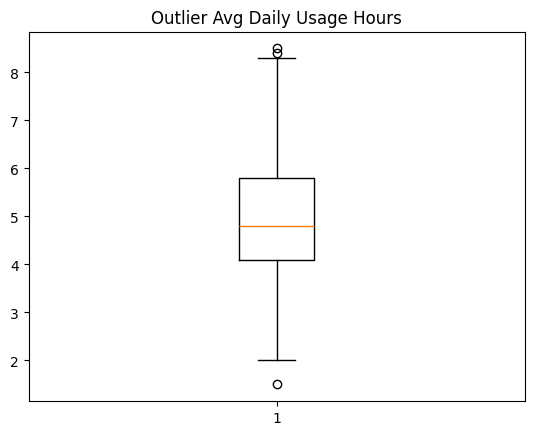

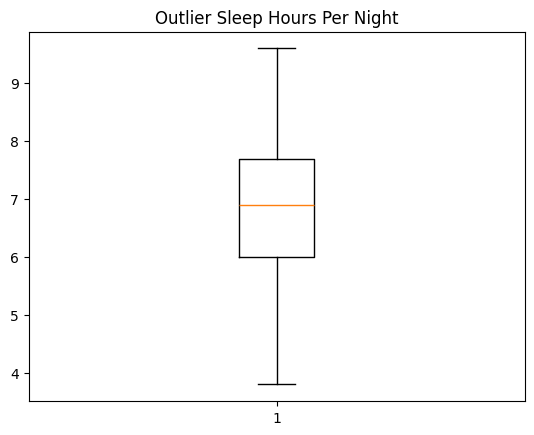

In [83]:
import matplotlib.pyplot as plt

plt.boxplot(df["Avg_Daily_Usage_Hours"])
plt.title("Outlier Avg Daily Usage Hours")
plt.show()



plt.boxplot(df["Sleep_Hours_Per_Night"])
plt.title("Outlier Sleep Hours Per Night")
plt.show()


### **STANDARISASI BAHASA (EN → ID)**

**Gender**

In [84]:
df['Gender'] = df['Gender'].map({
    'Male': 'Laki-laki',
    'Female': 'Perempuan'
})

**Academic Level**

In [85]:
df['Academic_Level'] = df['Academic_Level'].map({
    'High School': 'SMA/Sederajat',
    'Undergraduate': 'Sarjana',
    'Graduate': 'Pascasarjana'
})

**Relationship Status**

In [86]:
df['Relationship_Status'] = df['Relationship_Status'].map({
    'Single': 'Lajang',
    'In Relationship': 'Berpacaran',
    'Complicated': 'Rumit'
})

**Dampak Akademik**

In [87]:
df['Academic_Impact_Label'] = df['Affects_Academic_Performance'].map({
    'Yes': 'Terdampak',
    'No': 'Tidak Terdampak'
})

### **Feature Engineering**

**Intensitas Media Sosial**

In [88]:
df['Usage_Intensity'] = pd.cut(
    df['Avg_Daily_Usage_Hours'],
    bins=[0, 2, 5, 24],
    labels=['Rendah', 'Sedang', 'Tinggi']
)

**Kategori Kesehatan Mental**

In [89]:
df['Mental_Health_Category'] = pd.cut(
    df['Mental_Health_Score'],
    bins=[0, 3, 6, 10],
    labels=['Buruk', 'Sedang', 'Baik']
)

**Kualitas Tidur**

In [90]:
df['Sleep_Quality'] = pd.cut(
    df['Sleep_Hours_Per_Night'],
    bins=[0, 6, 7, 24],
    labels=['Kurang', 'Cukup', 'Baik']
)

**Tingkat Kecanduan Media Sosial**

In [91]:
# Kategori Tingkat Kecanduan (disesuaikan dengan standar BSMAS)
# Threshold disesuaikan: Risiko Tinggi ≥ 8.67 (setara 26/30 dalam BSMAS)
df['Addiction_Level'] = pd.cut(
    df['Addicted_Score'],
    bins=[0, 5, 8, 10],
    labels=['Risiko Rendah', 'Risiko Sedang', 'Risiko Tinggi']
)

# Kategori Risiko Kecanduan (Binary untuk filter)
df['High_Risk_Addiction'] = df['Addicted_Score'].apply(
    lambda x: 'Ya' if x >= 8.67 else 'Tidak'
)

### **Kategori Kelompok Rentan (Vulnerable Groups)**

In [92]:
# Kelompok Usia (Younger = lebih rentan menurut penelitian)
df['Age_Group'] = pd.cut(
    df['Age'],
    bins=[15, 19, 22, 26],
    labels=['16-19 (Sangat Muda)', '20-22 (Muda)', '23-25 (Dewasa Muda)']
)

# Kategori Demografi Risiko Tinggi
# Penelitian menunjukkan: perempuan muda lebih rentan
df['Vulnerable_Group'] = 'Tidak'
df.loc[(df['Gender'] == 'Perempuan') & (df['Age'] <= 21), 'Vulnerable_Group'] = 'Ya (Perempuan Muda)'
df.loc[(df['Gender'] == 'Laki-laki') & (df['Age'] <= 19), 'Vulnerable_Group'] = 'Ya (Laki-laki Sangat Muda)'

# Kategori Durasi Penggunaan (berdasarkan threshold 4 jam dalam penelitian)
df['Usage_Duration_Category'] = df['Avg_Daily_Usage_Hours'].apply(
    lambda x: 'Penggunaan Rendah (≤4 jam)' if x <= 4 else 'Penggunaan Tinggi (>4 jam)'
)

### **Kategori Kesehatan Mental yang Detail**

In [93]:
# Kategori Kesehatan Mental dengan threshold lebih spesifik
df['Mental_Health_Detail'] = pd.cut(
    df['Mental_Health_Score'],
    bins=[0, 3, 5, 7, 10],
    labels=['Sangat Buruk (1-3)', 'Buruk (4-5)', 'Sedang (6-7)', 'Baik (8-10)']
)

# Kategori Kualitas Tidur Detail
df['Sleep_Quality_Detail'] = pd.cut(
    df['Sleep_Hours_Per_Night'],
    bins=[0, 5, 6, 7, 9, 24],
    labels=['Sangat Kurang (<5h)', 'Kurang (5-6h)', 'Cukup (6-7h)', 'Baik (7-9h)', 'Berlebihan (>9h)']
)

### **Kategori Platform & Dampak**

In [94]:
# Kategori Platform Berdasarkan Jenis
platform_categories = {
    'Instagram': 'Visual/Photo',
    'TikTok': 'Video Pendek',
    'YouTube': 'Video Panjang',
    'Facebook': 'Sosial/Komunitas',
    'Snapchat': 'Visual/Photo',
    'Twitter': 'Teks/Diskusi',
    'LinkedIn': 'Profesional'
}

df['Platform_Type'] = df['Most_Used_Platform'].map(platform_categories).fillna('Lainnya')

# Tingkat Konflik
df['Conflict_Level'] = pd.cut(
    df['Conflicts_Over_Social_Media'],
    bins=[-1, 0, 2, 4, 10],
    labels=['Tidak Ada', 'Rendah', 'Sedang', 'Tinggi']
)

### **Dataset Final untuk Looker Studio**

In [95]:
# Dataset Final dengan Kolom yang Sesuai Referensi untuk Dashboard Looker Studio
final_df = df[[
    # === IDENTITAS & DEMOGRAFI ===
    'Student_ID',
    'Age',
    'Age_Group',
    'Gender',
    'Academic_Level',
    'Country',
    'Relationship_Status',
    'Vulnerable_Group',
    
    # === PENGGUNAAN MEDIA SOSIAL ===
    'Most_Used_Platform',
    'Platform_Type',
    'Avg_Daily_Usage_Hours',
    'Usage_Intensity',
    'Usage_Duration_Category',
    
    # === SKOR & TINGKAT KECANDUAN ===
    'Addicted_Score',
    'Addiction_Level',
    'High_Risk_Addiction',
    
    # === KESEHATAN MENTAL ===
    'Mental_Health_Score',
    'Mental_Health_Category',
    'Mental_Health_Detail',
    
    # === KUALITAS TIDUR ===
    'Sleep_Hours_Per_Night',
    'Sleep_Quality',
    'Sleep_Quality_Detail',
    
    # === KONFLIK & DAMPAK ===
    'Conflicts_Over_Social_Media',
    'Conflict_Level',
    'Academic_Impact_Label'
]]

# Menampilkan info dataset
print(f"Total Columns: {len(final_df.columns)}")
print(f"Total Records: {len(final_df)}")
print(f"\nSample Data:")
final_df.head()

Total Columns: 25
Total Records: 705

Sample Data:


,Student_ID,Age,Age_Group,Gender,Academic_Level,Country,Relationship_Status,Vulnerable_Group,Most_Used_Platform,Platform_Type,...,High_Risk_Addiction,Mental_Health_Score,Mental_Health_Category,Mental_Health_Detail,Sleep_Hours_Per_Night,Sleep_Quality,Sleep_Quality_Detail,Conflicts_Over_Social_Media,Conflict_Level,Academic_Impact_Label
0,1,19,16-19 (Sangat Muda),Perempuan,Sarjana,Bangladesh,Berpacaran,Ya (Perempuan Muda),Instagram,Visual/Photo,...,Tidak,6,Sedang,Sedang (6-7),6.5,Cukup,Cukup (6-7h),3,Sedang,Terdampak
1,2,22,20-22 (Muda),Laki-laki,Pascasarjana,India,Lajang,Tidak,Twitter,Teks/Diskusi,...,Tidak,8,Baik,Baik (8-10),7.5,Baik,Baik (7-9h),0,Tidak Ada,Tidak Terdampak
2,3,20,20-22 (Muda),Perempuan,Sarjana,USA,Rumit,Ya (Perempuan Muda),TikTok,Video Pendek,...,Ya,5,Sedang,Buruk (4-5),5.0,Kurang,Sangat Kurang (<5h),4,Sedang,Terdampak
3,4,18,16-19 (Sangat Muda),Laki-laki,SMA/Sederajat,UK,Lajang,Ya (Laki-laki Sangat Muda),YouTube,Video Panjang,...,Tidak,7,Baik,Sedang (6-7),7.0,Cukup,Cukup (6-7h),1,Rendah,Tidak Terdampak
4,5,21,20-22 (Muda),Laki-laki,Pascasarjana,Canada,Berpacaran,Tidak,Facebook,Sosial/Komunitas,...,Tidak,6,Sedang,Sedang (6-7),6.0,Kurang,Kurang (5-6h),2,Rendah,Terdampak


**Export ke CSV**

In [96]:
final_df.to_csv(
    'dataset_looker_student_social_media_clean.csv',
    index=False
)


**Validasi & Summary Statistik untuk Dashboard**

In [97]:
# Summary Statistik untuk Validasi
print("="*60)
print("SUMMARY DATASET UNTUK LOOKER STUDIO")
print("="*60)

print(f"\n📊 Total Records: {len(final_df)}")
print(f"📊 Total Kolom: {len(final_df.columns)}")

print("\n" + "="*60)
print("DISTRIBUSI KATEGORI KUNCI")
print("="*60)

print("\n🎯 Tingkat Kecanduan:")
print(final_df['Addiction_Level'].value_counts())

print("\n🎯 Risiko Tinggi Kecanduan:")
print(final_df['High_Risk_Addiction'].value_counts())

print("\n🎯 Kelompok Rentan:")
print(final_df['Vulnerable_Group'].value_counts())

print("\n🎯 Kesehatan Mental Detail:")
print(final_df['Mental_Health_Detail'].value_counts())

print("\n🎯 Platform Type:")
print(final_df['Platform_Type'].value_counts())

print("\n🎯 Kategori Durasi Penggunaan:")
print(final_df['Usage_Duration_Category'].value_counts())

print("\n" + "="*60)
print("STATISTIK NUMERIK KUNCI")
print("="*60)
print(final_df[['Avg_Daily_Usage_Hours', 'Mental_Health_Score', 
               'Sleep_Hours_Per_Night', 'Addicted_Score']].describe())

SUMMARY DATASET UNTUK LOOKER STUDIO

📊 Total Records: 705
📊 Total Kolom: 25

DISTRIBUSI KATEGORI KUNCI

🎯 Tingkat Kecanduan:
Addiction_Level
Risiko Sedang    414
Risiko Rendah    236
Risiko Tinggi     55
Name: count, dtype: int64

🎯 Risiko Tinggi Kecanduan:
High_Risk_Addiction
Tidak    650
Ya        55
Name: count, dtype: int64

🎯 Kelompok Rentan:
Vulnerable_Group
Tidak                         351
Ya (Perempuan Muda)           317
Ya (Laki-laki Sangat Muda)     37
Name: count, dtype: int64

🎯 Kesehatan Mental Detail:
Mental_Health_Detail
Sedang (6-7)          397
Buruk (4-5)           202
Baik (8-10)           106
Sangat Buruk (1-3)      0
Name: count, dtype: int64

🎯 Platform Type:
Platform_Type
Visual/Photo        262
Video Pendek        154
Sosial/Komunitas    123
Lainnya             105
Teks/Diskusi         30
Profesional          21
Video Panjang        10
Name: count, dtype: int64

🎯 Kategori Durasi Penggunaan:
Usage_Duration_Category
Penggunaan Tinggi (>4 jam)    536
Penggunaan 